In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import math

In [2]:
df = pd.read_csv('dataset/Basket.csv', sep=',')
df

,Country,Customer ID,Description,Invoice,InvoiceDate,Price,Quantity,StockCode
0,United Kingdom,13085.0,15CM CHRISTMAS GLASS BALL 20 LIGHTS,489434,01/12/2009 07:45,"6,95",12,85048
1,United Kingdom,13085.0,PINK CHERRY LIGHTS,489434,01/12/2009 07:45,"6,75",12,79323P
2,United Kingdom,13085.0,WHITE CHERRY LIGHTS,489434,01/12/2009 07:45,"6,75",12,79323W
3,United Kingdom,13085.0,"RECORD FRAME 7"" SINGLE SIZE",489434,01/12/2009 07:45,"2,1",48,22041
4,United Kingdom,13085.0,STRAWBERRY CERAMIC TRINKET BOX,489434,01/12/2009 07:45,"1,25",24,21232
...,...,...,...,...,...,...,...,...
1067366,France,12680.0,CHILDREN'S APRON DOLLY GIRL,581587,09/12/2011 12:50,"2,1",6,22899
1067367,France,12680.0,CHILDRENS CUTLERY DOLLY GIRL,581587,09/12/2011 12:50,"4,15",4,23254
1067368,France,12680.0,CHILDRENS CUTLERY CIRCUS PARADE,581587,09/12/2011 12:50,"4,15",4,23255
1067369,France,12680.0,BAKING SET 9 PIECE RETROSPOT,581587,09/12/2011 12:50,"4,95",3,22138


In [3]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate']) # converting 'InvoiceDate' to datetime

In [4]:
df['Price'] = df['Price'].str.replace(',','.')
df

,Country,Customer ID,Description,Invoice,InvoiceDate,Price,Quantity,StockCode
0,United Kingdom,13085.0,15CM CHRISTMAS GLASS BALL 20 LIGHTS,489434,2009-01-12 07:45:00,6.95,12,85048
1,United Kingdom,13085.0,PINK CHERRY LIGHTS,489434,2009-01-12 07:45:00,6.75,12,79323P
2,United Kingdom,13085.0,WHITE CHERRY LIGHTS,489434,2009-01-12 07:45:00,6.75,12,79323W
3,United Kingdom,13085.0,"RECORD FRAME 7"" SINGLE SIZE",489434,2009-01-12 07:45:00,2.1,48,22041
4,United Kingdom,13085.0,STRAWBERRY CERAMIC TRINKET BOX,489434,2009-01-12 07:45:00,1.25,24,21232
...,...,...,...,...,...,...,...,...
1067366,France,12680.0,CHILDREN'S APRON DOLLY GIRL,581587,2011-09-12 12:50:00,2.1,6,22899
1067367,France,12680.0,CHILDRENS CUTLERY DOLLY GIRL,581587,2011-09-12 12:50:00,4.15,4,23254
1067368,France,12680.0,CHILDRENS CUTLERY CIRCUS PARADE,581587,2011-09-12 12:50:00,4.15,4,23255
1067369,France,12680.0,BAKING SET 9 PIECE RETROSPOT,581587,2011-09-12 12:50:00,4.95,3,22138


In [5]:
df['Price'] =df['Price'].astype(float)

Data analysis

In [8]:
pd.options.display.float_format = '{:.2f}'.format
df.describe() # this function provides a summary of statistical informations

,Customer ID,Price,Quantity
count,824364.00,1067371.00,1067371.00
mean,15324.64,4.65,9.94
std,1697.46,123.55,172.71
min,12346.00,-53594.36,-80995.00
25%,13975.00,1.25,1.00
50%,15255.00,2.10,3.00
75%,16797.00,4.15,10.00
max,18287.00,38970.00,80995.00


In [31]:
df[(df.Invoice.str.contains('C'))]

,Country,Customer ID,Description,Invoice,InvoiceDate,Price,Quantity,StockCode
178,Australia,16321.0,PAPER BUNTING WHITE LACE,C489449,2009-01-12 10:33:00,2.95,-12,22087
179,Australia,16321.0,CREAM FELT EASTER EGG BASKET,C489449,2009-01-12 10:33:00,1.65,-6,85206A
180,Australia,16321.0,POTTING SHED SOW 'N' GROW SET,C489449,2009-01-12 10:33:00,4.25,-4,21895
181,Australia,16321.0,POTTING SHED TWINE,C489449,2009-01-12 10:33:00,2.10,-6,21896
182,Australia,16321.0,PAPER CHAIN KIT RETRO SPOT,C489449,2009-01-12 10:33:00,2.95,-12,22083
...,...,...,...,...,...,...,...,...
1065910,United Kingdom,14397.0,ZINC T-LIGHT HOLDER STARS SMALL,C581490,2011-09-12 09:57:00,0.83,-11,23144
1067002,United Kingdom,15498.0,Manual,C581499,2011-09-12 10:28:00,224.69,-1,M
1067176,United Kingdom,15311.0,VICTORIAN SEWING BOX LARGE,C581568,2011-09-12 11:57:00,10.95,-5,21258
1067177,United Kingdom,17315.0,HANGING HEART JAR T-LIGHT HOLDER,C581569,2011-09-12 11:58:00,1.25,-1,84978


In [32]:
df[(df.Quantity < 0)]

,Country,Customer ID,Description,Invoice,InvoiceDate,Price,Quantity,StockCode
178,Australia,16321.0,PAPER BUNTING WHITE LACE,C489449,2009-01-12 10:33:00,2.95,-12,22087
179,Australia,16321.0,CREAM FELT EASTER EGG BASKET,C489449,2009-01-12 10:33:00,1.65,-6,85206A
180,Australia,16321.0,POTTING SHED SOW 'N' GROW SET,C489449,2009-01-12 10:33:00,4.25,-4,21895
181,Australia,16321.0,POTTING SHED TWINE,C489449,2009-01-12 10:33:00,2.10,-6,21896
182,Australia,16321.0,PAPER CHAIN KIT RETRO SPOT,C489449,2009-01-12 10:33:00,2.95,-12,22083
...,...,...,...,...,...,...,...,...
1065910,United Kingdom,14397.0,ZINC T-LIGHT HOLDER STARS SMALL,C581490,2011-09-12 09:57:00,0.83,-11,23144
1067002,United Kingdom,15498.0,Manual,C581499,2011-09-12 10:28:00,224.69,-1,M
1067176,United Kingdom,15311.0,VICTORIAN SEWING BOX LARGE,C581568,2011-09-12 11:57:00,10.95,-5,21258
1067177,United Kingdom,17315.0,HANGING HEART JAR T-LIGHT HOLDER,C581569,2011-09-12 11:58:00,1.25,-1,84978


In [30]:
df[(df.Invoice.str.contains('C')) & (df.Quantity < 0)]

,Country,Customer ID,Description,Invoice,InvoiceDate,Price,Quantity,StockCode
178,Australia,16321.0,PAPER BUNTING WHITE LACE,C489449,2009-01-12 10:33:00,2.95,-12,22087
179,Australia,16321.0,CREAM FELT EASTER EGG BASKET,C489449,2009-01-12 10:33:00,1.65,-6,85206A
180,Australia,16321.0,POTTING SHED SOW 'N' GROW SET,C489449,2009-01-12 10:33:00,4.25,-4,21895
181,Australia,16321.0,POTTING SHED TWINE,C489449,2009-01-12 10:33:00,2.10,-6,21896
182,Australia,16321.0,PAPER CHAIN KIT RETRO SPOT,C489449,2009-01-12 10:33:00,2.95,-12,22083
...,...,...,...,...,...,...,...,...
1065910,United Kingdom,14397.0,ZINC T-LIGHT HOLDER STARS SMALL,C581490,2011-09-12 09:57:00,0.83,-11,23144
1067002,United Kingdom,15498.0,Manual,C581499,2011-09-12 10:28:00,224.69,-1,M
1067176,United Kingdom,15311.0,VICTORIAN SEWING BOX LARGE,C581568,2011-09-12 11:57:00,10.95,-5,21258
1067177,United Kingdom,17315.0,HANGING HEART JAR T-LIGHT HOLDER,C581569,2011-09-12 11:58:00,1.25,-1,84978


In [35]:
df = df[df.Invoice.str.contains('C') == False]

In [37]:
df =df[(df.Quantity > 0)]

In [39]:
df

,Country,Customer ID,Description,Invoice,InvoiceDate,Price,Quantity,StockCode
0,United Kingdom,13085.0,15CM CHRISTMAS GLASS BALL 20 LIGHTS,489434,2009-01-12 07:45:00,6.95,12,85048
1,United Kingdom,13085.0,PINK CHERRY LIGHTS,489434,2009-01-12 07:45:00,6.75,12,79323P
2,United Kingdom,13085.0,WHITE CHERRY LIGHTS,489434,2009-01-12 07:45:00,6.75,12,79323W
3,United Kingdom,13085.0,"RECORD FRAME 7"" SINGLE SIZE",489434,2009-01-12 07:45:00,2.10,48,22041
4,United Kingdom,13085.0,STRAWBERRY CERAMIC TRINKET BOX,489434,2009-01-12 07:45:00,1.25,24,21232
...,...,...,...,...,...,...,...,...
1067366,France,12680.0,CHILDREN'S APRON DOLLY GIRL,581587,2011-09-12 12:50:00,2.10,6,22899
1067367,France,12680.0,CHILDRENS CUTLERY DOLLY GIRL,581587,2011-09-12 12:50:00,4.15,4,23254
1067368,France,12680.0,CHILDRENS CUTLERY CIRCUS PARADE,581587,2011-09-12 12:50:00,4.15,4,23255
1067369,France,12680.0,BAKING SET 9 PIECE RETROSPOT,581587,2011-09-12 12:50:00,4.95,3,22138


In [40]:
df.to_csv(r'C:\Users\Stefano\Desktop\Data-Mining-Project\dataset\new_Basket.csv', index = False, header=True)

In [9]:
df = pd.read_csv('dataset/new_Basket.csv', sep=',')
df

C:\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Country,Customer ID,Description,Invoice,InvoiceDate,Price,Quantity,StockCode
0,United Kingdom,13085.00,15CM CHRISTMAS GLASS BALL 20 LIGHTS,489434,2009-01-12 07:45:00,6.95,12,85048
1,United Kingdom,13085.00,PINK CHERRY LIGHTS,489434,2009-01-12 07:45:00,6.75,12,79323P
2,United Kingdom,13085.00,WHITE CHERRY LIGHTS,489434,2009-01-12 07:45:00,6.75,12,79323W
3,United Kingdom,13085.00,"RECORD FRAME 7"" SINGLE SIZE",489434,2009-01-12 07:45:00,2.10,48,22041
4,United Kingdom,13085.00,STRAWBERRY CERAMIC TRINKET BOX,489434,2009-01-12 07:45:00,1.25,24,21232
...,...,...,...,...,...,...,...,...
1044415,France,12680.00,CHILDREN'S APRON DOLLY GIRL,581587,2011-09-12 12:50:00,2.10,6,22899
1044416,France,12680.00,CHILDRENS CUTLERY DOLLY GIRL,581587,2011-09-12 12:50:00,4.15,4,23254
1044417,France,12680.00,CHILDRENS CUTLERY CIRCUS PARADE,581587,2011-09-12 12:50:00,4.15,4,23255
1044418,France,12680.00,BAKING SET 9 PIECE RETROSPOT,581587,2011-09-12 12:50:00,4.95,3,22138


<h1>Distribution of Data</h1>

In [13]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

<ipython-input-14-f1868d69379d>:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df['InvoiceDate'].groupby([df.InvoiceDate.dt.year, df.InvoiceDate.dt.week]).agg('count').plot(kind="bar")


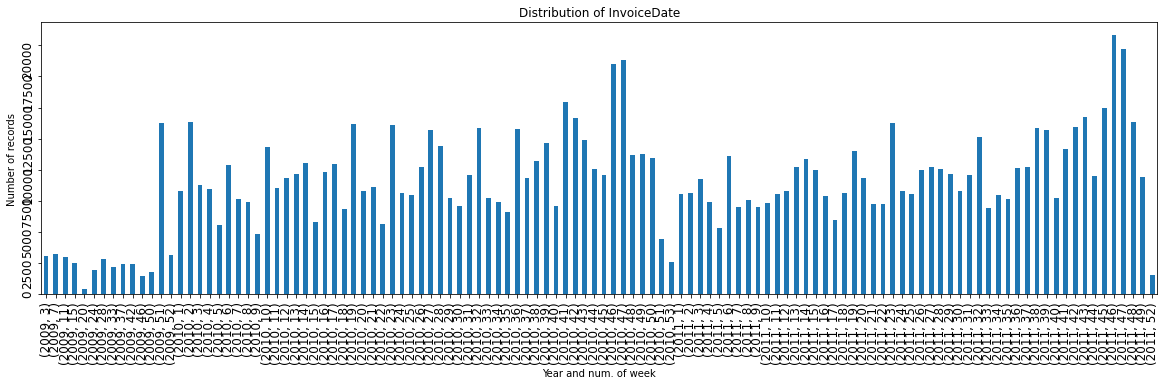

In [14]:
plt.figure(figsize=(20, 5))
df['InvoiceDate'].groupby([df.InvoiceDate.dt.year, df.InvoiceDate.dt.week]).agg('count').plot(kind="bar")
plt.title("Distribution of InvoiceDate")
plt.xlabel("Year and num. of week")
plt.ylabel("Number of records")
plt.tick_params(labelrotation=90, labelsize='large')
plt.show()

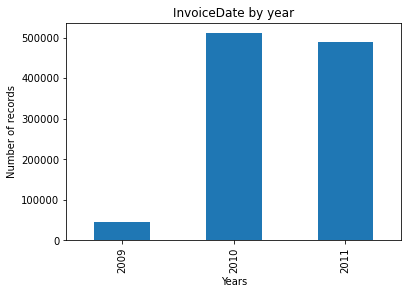

In [15]:
df['InvoiceDate'].groupby(df.InvoiceDate.dt.year).agg('count').plot(kind="bar")
plt.title("InvoiceDate by year")
plt.xlabel("Years")
plt.ylabel("Number of records")
plt.show()

In [16]:
df.Country.value_counts()

United Kingdom          961223
EIRE                     17354
Germany                  16703
France                   13941
Netherlands               5093
Spain                     3720
Switzerland               3137
Belgium                   3069
Portugal                  2562
Australia                 1815
Channel Islands           1569
Italy                     1468
Norway                    1437
Sweden                    1338
Cyprus                    1155
Finland                   1032
Austria                    922
Denmark                    798
Unspecified                752
Greece                     657
Poland                     512
Japan                      485
United Arab Emirates       467
USA                        409
Israel                     369
Hong Kong                  358
Singapore                  339
Malta                      282
Iceland                    253
Canada                     228
Lithuania                  189
RSA                        168
Bahrain 

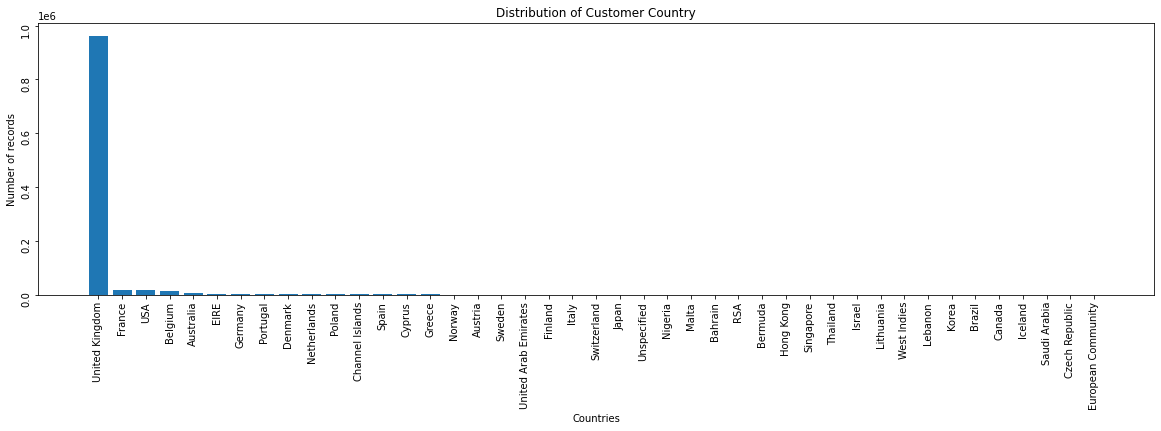

In [22]:
plt.figure(figsize=(20, 5))
plt.bar(df.Country.unique(),df.Country.value_counts())
plt.tick_params(labelrotation=90)
plt.title("Distribution of Customer Country")
plt.xlabel("Countries")
plt.ylabel("Number of records")
plt.show() 

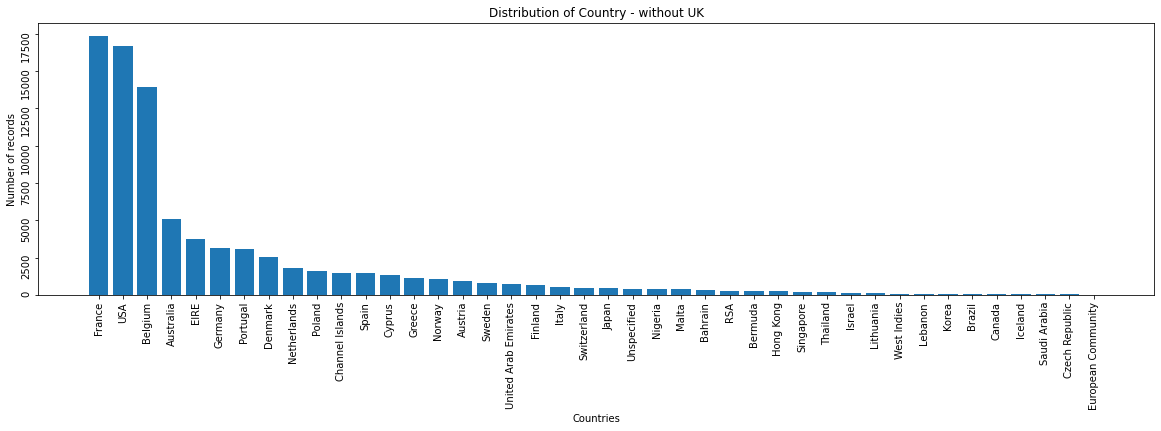

In [23]:
plt.figure(figsize=(20, 5))
plt.bar(df[df.Country != 'United Kingdom'].Country.unique(), df[df.Country != 'United Kingdom'].Country.value_counts())
plt.tick_params(labelrotation=90)
plt.title("Distribution of Country - without UK")
plt.xlabel("Countries")
plt.ylabel("Number of records")
plt.show()

<h2>Duplicate and missing data</h2>

In [24]:
df.duplicated().value_counts()

False    1010542
True       33878
dtype: int64

In [25]:
duplicates = df[df.duplicated()]
duplicates.head()

,Country,Customer ID,Description,Invoice,InvoiceDate,Price,Quantity,StockCode
342,United Kingdom,16329.00,VINTAGE SNAKES & LADDERS,489517,2009-01-12 11:34:00,3.75,1,21912
354,United Kingdom,16329.00,PARTY CONE CHRISTMAS DECORATION,489517,2009-01-12 11:34:00,0.85,6,22130
355,United Kingdom,16329.00,HAIRCLIPS FORTIES FABRIC ASSORTED,489517,2009-01-12 11:34:00,0.65,12,22319
356,United Kingdom,16329.00,VINTAGE SEASIDE JIGSAW PUZZLES,489517,2009-01-12 11:34:00,3.75,1,21913
357,United Kingdom,16329.00,GLITTER STAR GARLAND WITH BELLS,489517,2009-01-12 11:34:00,3.75,1,21821


In [32]:
duplicates[(duplicates.Description == "VINTAGE SNAKES & LADDERS") & (duplicates["Customer ID"] == 16329)]

,Country,Customer ID,Description,Invoice,InvoiceDate,Price,Quantity,StockCode
342,United Kingdom,16329.00,VINTAGE SNAKES & LADDERS,489517,2009-01-12 11:34:00,3.75,1,21912
365,United Kingdom,16329.00,VINTAGE SNAKES & LADDERS,489517,2009-01-12 11:34:00,3.75,1,21912


In [35]:
df.drop_duplicates(inplace=True)
df.duplicated().any()

False

In [38]:
df.isnull().any()

Country        False
Customer ID     True
Description     True
Invoice        False
InvoiceDate    False
Price          False
Quantity       False
StockCode      False
dtype: bool

In [39]:
df[df.Quantity == 0].Quantity.count() #Zero values in Quantity

0

In [40]:
df[df.Price == 0].Price.count() #Zero values in Price

2621

In [41]:
df["Customer ID"].isnull().sum()

231044

In [46]:
country_mode = df['Customer ID'].groupby(df['Country']).agg(lambda x:x.mode())
country_mode

Country
Australia              12415.00
Austria                12360.00
Bahrain                12355.00
Belgium                12417.00
Bermuda                      []
Brazil                 12751.00
Canada                 17444.00
Channel Islands        14936.00
Cyprus                 12359.00
Czech Republic         12781.00
Denmark                12406.00
EIRE                   14911.00
European Community     15108.00
Finland                12428.00
France                 12681.00
Germany                12471.00
Greece                 17508.00
Hong Kong                    []
Iceland                12347.00
Israel                 12688.00
Italy                  12594.00
Japan                  12753.00
Korea                  12767.00
Lebanon                12764.00
Lithuania              15332.00
Malta                  15480.00
Netherlands            14646.00
Nigeria                15702.00
Norway                 12433.00
Poland                 12779.00
Portugal               12766.00


In [51]:
df[df['Customer ID'] == 18300].count() #We check to see if the custom ID is already present within the dataset 

Country        0
Customer ID    0
Description    0
Invoice        0
InvoiceDate    0
Price          0
Quantity       0
StockCode      0
dtype: int64

In [52]:
country_mode["Hong Kong"] = 18300

In [53]:
df[df['Customer ID'] == 18301].count() #We check to see if the custom ID is already present within the dataset 

Country        0
Customer ID    0
Description    0
Invoice        0
InvoiceDate    0
Price          0
Quantity       0
StockCode      0
dtype: int64

In [54]:
country_mode["Bermuda"] = 18301

In [55]:
#We replace the missing values from CustomerID with the elements from country_mode
df['Customer ID'] = df.apply(
    lambda row: country_mode[row['Country']] if pd.isnull(row['Customer ID']) else row['Customer ID'],
    axis=1
)

In [56]:
df["Customer ID"].isnull().sum()

0

<h2>Outliers Detection</h2>

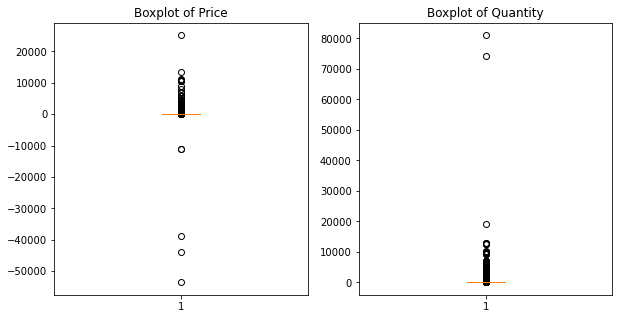

In [58]:
f, axs = plt.subplots(ncols=2, figsize=(10,5))
axs[0].boxplot(df.Price)
axs[0].set_title('Boxplot of Price')
axs[1].boxplot(df.Quantity)
axs[1].set_title('Boxplot of Quantity')
plt.show()

In [60]:
def iqr_values(s): 
    q1 = s.quantile(q = 0.25)
    q3 = s.quantile(q = 0.75)
    iqr = q3 - q1
    iqr_left = q1 - 1.5*iqr
    iqr_right = q3 + 1.5*iqr
    return iqr_left, iqr_right

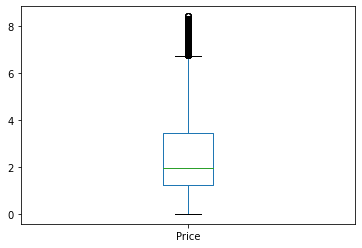

In [61]:
left_price, right_price = iqr_values(df.Price)
df[(df.Price > left_price) & (df.Price < right_price)].Price.plot.box()
plt.show()

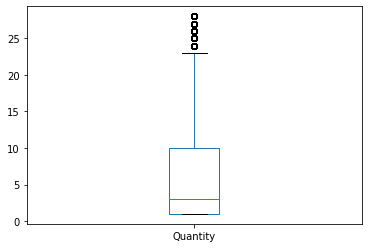

In [63]:
left_qta, right_qta = iqr_values(df.Quantity)
df[(df.Quantity > left_qta) & (df.Quantity < right_qta)].Quantity.plot.box()
plt.show()

In [64]:
df_outliers = df[(df.Price < left_price) | (df.Price > right_price) | (df.Quantity < left_qta) | (df.Quantity > right_qta)]
df_outliers

,Country,Customer ID,Description,Invoice,InvoiceDate,Price,Quantity,StockCode
3,United Kingdom,13085.00,"RECORD FRAME 7"" SINGLE SIZE",489434,2009-01-12 07:45:00,2.10,48,22041
22,United Kingdom,13078.00,BLACK DINER WALL CLOCK,489436,2009-01-12 09:06:00,8.50,2,22194
35,United Kingdom,15362.00,JOY LARGE WOOD LETTERS,489437,2009-01-12 09:08:00,9.95,1,21360
38,United Kingdom,15362.00,WOODEN BOX ADVENT CALENDAR,489437,2009-01-12 09:08:00,8.95,2,35400
55,United Kingdom,18102.00,SET OF MEADOW FLOWER STICKERS,489438,2009-01-12 09:24:00,1.69,30,21252
...,...,...,...,...,...,...,...,...
1044376,United Kingdom,13777.00,6 CHOCOLATE LOVE HEART T-LIGHTS,581583,2011-09-12 12:23:00,1.85,36,85038
1044377,United Kingdom,13777.00,RED FLOCK LOVE HEART PHOTO FRAME,581584,2011-09-12 12:25:00,0.72,72,20832
1044378,United Kingdom,13777.00,6 CHOCOLATE LOVE HEART T-LIGHTS,581584,2011-09-12 12:25:00,1.85,48,85038
1044402,United Kingdom,13113.00,RED RETROSPOT ROUND CAKE TINS,581586,2011-09-12 12:49:00,8.95,24,21217


In [65]:
df.drop(df_outliers.index, inplace=True)

In [67]:
df.to_csv(r'C:\Users\Stefano\Desktop\Data-Mining-Project\dataset\new_Basket_2.csv', index = False, header=True)

<h3>Splitting DataFrame by year</h3>

In [68]:
df_09 = df[pd.DatetimeIndex(df['InvoiceDate']).year == 2009.0]
df_09

,Country,Customer ID,Description,Invoice,InvoiceDate,Price,Quantity,StockCode
0,United Kingdom,13085.00,15CM CHRISTMAS GLASS BALL 20 LIGHTS,489434,2009-01-12 07:45:00,6.95,12,85048
1,United Kingdom,13085.00,PINK CHERRY LIGHTS,489434,2009-01-12 07:45:00,6.75,12,79323P
2,United Kingdom,13085.00,WHITE CHERRY LIGHTS,489434,2009-01-12 07:45:00,6.75,12,79323W
4,United Kingdom,13085.00,STRAWBERRY CERAMIC TRINKET BOX,489434,2009-01-12 07:45:00,1.25,24,21232
5,United Kingdom,13085.00,PINK DOUGHNUT TRINKET POT,489434,2009-01-12 07:45:00,1.65,24,22064
...,...,...,...,...,...,...,...,...
44117,United Kingdom,17867.00,REX CASH+CARRY JUMBO SHOPPER,493407,2009-12-23 16:04:00,0.95,10,21034
44118,United Kingdom,17841.00,CRYSTAL STUD EARRINGS ASSORTED COL,493408,2009-12-23 16:21:00,0.38,1,90058B
44119,United Kingdom,17841.00,PINK VINTAGE PAISLEY PICNIC BAG,493408,2009-12-23 16:21:00,2.95,1,21933
44120,United Kingdom,17841.00,STRAWBERRY PICNIC BAG,493408,2009-12-23 16:21:00,2.95,1,21937


In [69]:
df_10 = df[pd.DatetimeIndex(df['InvoiceDate']).year == 2010.0]
df_10

,Country,Customer ID,Description,Invoice,InvoiceDate,Price,Quantity,StockCode
44123,United Kingdom,12346.00,This is a test product.,493410,2010-04-01 09:24:00,4.50,5,TEST001
44124,United Kingdom,12346.00,This is a test product.,493412,2010-04-01 09:53:00,4.50,5,TEST001
44125,United Kingdom,17841.00,PANDA AND BUNNIES STICKER SHEET,493413,2010-04-01 09:54:00,0.85,1,21724
44126,United Kingdom,17841.00,ELEPHANT TOY WITH BLUE T-SHIRT,493413,2010-04-01 09:54:00,3.75,1,84578
44127,United Kingdom,17841.00,ALPHABET HEARTS STICKER SHEET,493413,2010-04-01 09:54:00,0.85,1,21723
...,...,...,...,...,...,...,...,...
554812,United Kingdom,17841.00,4 WILDFLOWER BOTANICAL CANDLES,539991,2010-12-23 16:49:00,1.25,1,21618
554813,United Kingdom,17841.00,GRAND CHOCOLATECANDLE,539991,2010-12-23 16:49:00,1.45,4,72741
554814,United Kingdom,17841.00,FLOWER VINE RAFFIA FOOD COVER,539992,2010-12-23 17:41:00,3.75,1,21470
554815,United Kingdom,17841.00,FELT FARM ANIMAL RABBIT,539992,2010-12-23 17:41:00,1.25,1,22258


In [70]:
df_11 = df[pd.DatetimeIndex(df['InvoiceDate']).year == 2011.0]
df_11

,Country,Customer ID,Description,Invoice,InvoiceDate,Price,Quantity,StockCode
554817,United Kingdom,13313.00,JUMBO BAG PINK POLKADOT,539993,2011-04-01 10:00:00,1.95,10,22386
554818,United Kingdom,13313.00,BLUE POLKADOT WRAP,539993,2011-04-01 10:00:00,0.42,25,21499
554819,United Kingdom,13313.00,RED RETROSPOT WRAP,539993,2011-04-01 10:00:00,0.42,25,21498
554820,United Kingdom,13313.00,RECYCLING BAG RETROSPOT,539993,2011-04-01 10:00:00,2.10,5,22379
554821,United Kingdom,13313.00,RED RETROSPOT SHOPPER BAG,539993,2011-04-01 10:00:00,1.25,10,20718
...,...,...,...,...,...,...,...,...
1044414,France,12680.00,PACK OF 20 SPACEBOY NAPKINS,581587,2011-09-12 12:50:00,0.85,12,22613
1044415,France,12680.00,CHILDREN'S APRON DOLLY GIRL,581587,2011-09-12 12:50:00,2.10,6,22899
1044416,France,12680.00,CHILDRENS CUTLERY DOLLY GIRL,581587,2011-09-12 12:50:00,4.15,4,23254
1044417,France,12680.00,CHILDRENS CUTLERY CIRCUS PARADE,581587,2011-09-12 12:50:00,4.15,4,23255


In [71]:
df_09.to_csv(r'C:\Users\Stefano\Desktop\Data-Mining-Project\dataset\new_Basket_2_2009.csv', index = False, header=True)
df_10.to_csv(r'C:\Users\Stefano\Desktop\Data-Mining-Project\dataset\new_Basket_2_2010.csv', index = False, header=True)
df_11.to_csv(r'C:\Users\Stefano\Desktop\Data-Mining-Project\dataset\new_Basket_2_2011.csv', index = False, header=True)